# Breast Cancer Prediction

## 1. Importing Libraries

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import *
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score,
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 2. Preprocessing Dataset

In [8]:
df = pd.read_csv('breast_cancer_data.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


##### This data only has 2 label output classes, M = malignant (detected cancer) and B = benign (not cancer)

In [4]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.shape

(569, 33)

##### Printing all the NULL values in all the columns

In [9]:
np.sum(df.isna())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

#### Dropping Unamed Columns

In [12]:
df = df.drop('Unnamed: 32',axis=1)

#### Correlation cannot be done because there is still categorical data in the table

In [13]:
# df.corr will produce an error
# ValueError: could not convert string to float: 'M'

## Correlation

##### Dropping 'id' column to make dataset Categorical

In [16]:
corr = df.copy().drop("id",axis=1)

##### Defining mapping function  and applying to categorize the data into 'Malignant' and 'Benign'

In [14]:
def mapping(x):
    if x == 'M':
        return 1
    return 0

In [17]:
corr['diagnosis'] = corr['diagnosis'].apply(mapping)

##### Renaming 'Diagnosis' to 'Malignant_cancer'

In [18]:
corr = corr.rename({'diagnosis':'malignant_cancer'},axis='columns')

##### Creating a correlation matrix and correlation coefficients

In [20]:
data = corr.corr()

# Creating Correlation Coefficients Dataframe by removing the 'malignant_cancer' column
data_cancer = pd.DataFrame(data['malignant_cancer']).drop("malignant_cancer",axis="rows")

# Sorting the dataframe in descendind order
data_cancer = data_cancer.sort_values("malignant_cancer", ascending= False)

##### Creating Correlation HeatMap

Correlation heatmap for all variables in the data DataFrame.

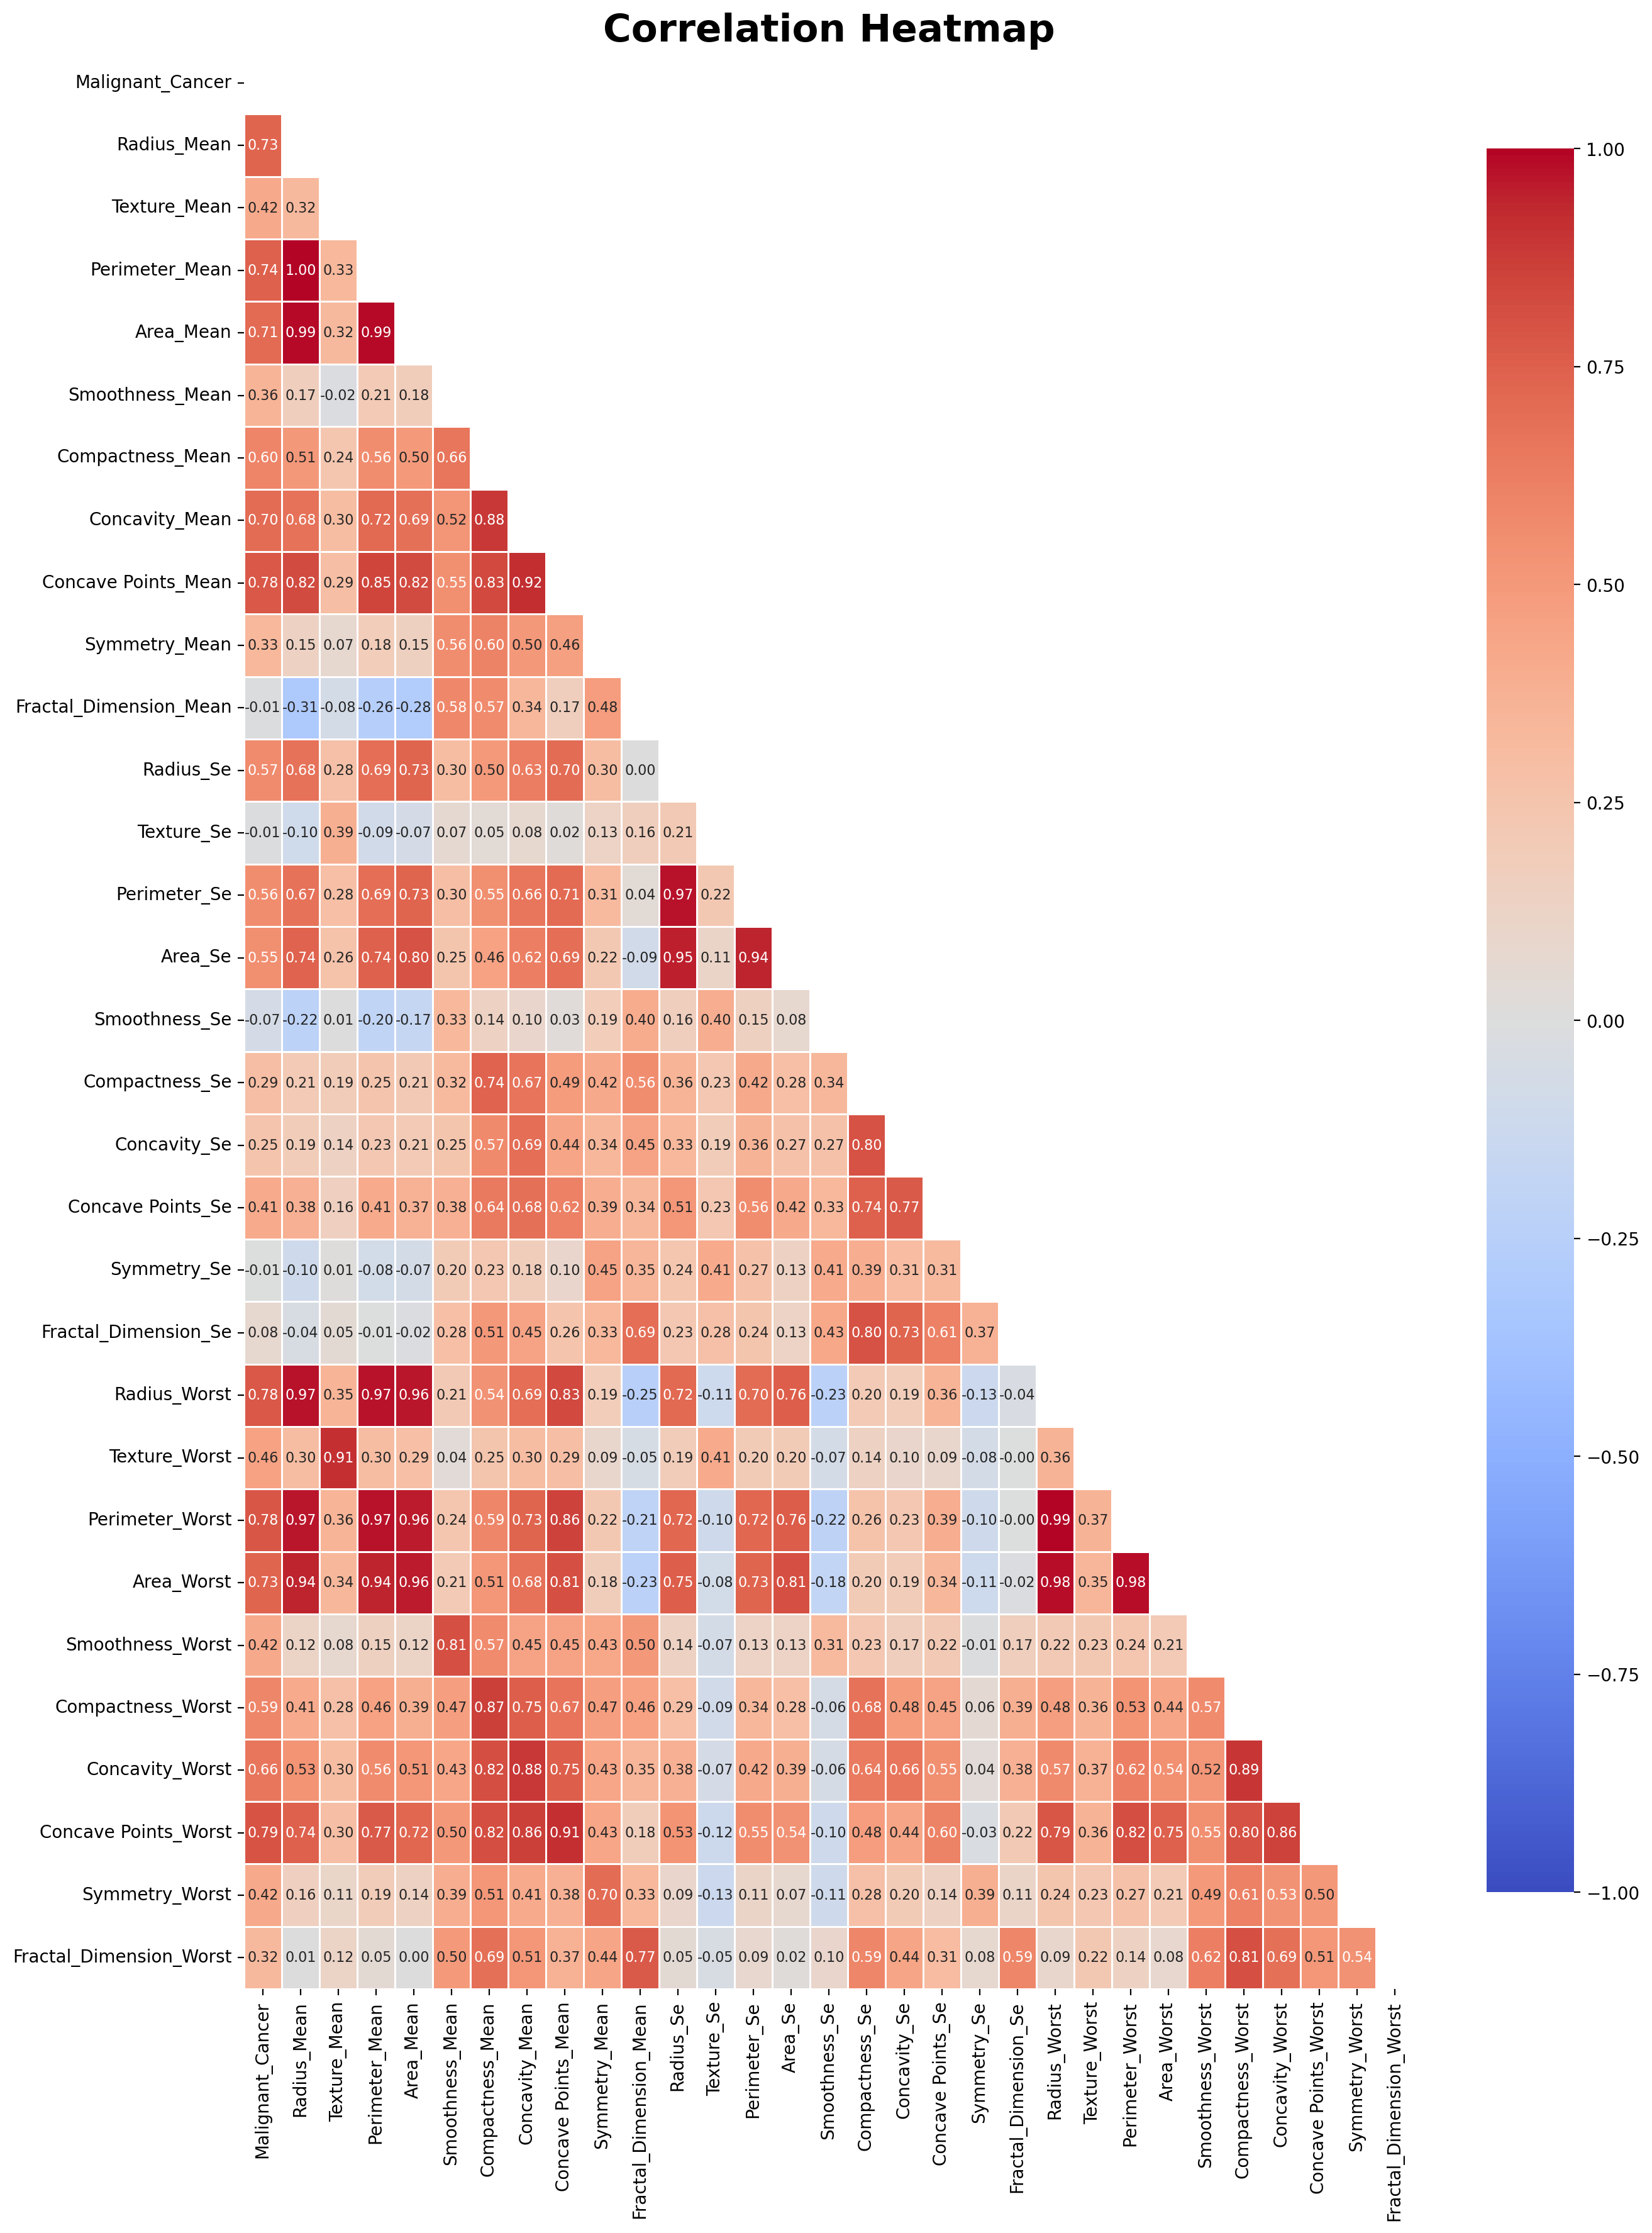

In [25]:
fig,ax =plt.subplots(figsize=(15,20),dpi=200)
mask = np.triu(np.ones_like(data,dtype=bool))
cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(data=data,mask=mask,annot=True,fmt=".2f",cmap=cmap,linewidth=1,vmin=-1,vmax=1,cbar_kws={"shrink":0.9},annot_kws={"size":8})

yticks = [i.title() for i in data.index]
xticks = [i.title() for i in data.columns]
plt.yticks(plt.yticks()[0],labels = yticks,rotation=0)
plt.xticks(plt.xticks()[0],labels = xticks)
plt.title("Correlation Heatmap", fontsize=22, fontweight= "bold")
plt.show()

Correlations of variables with 'malignant_cancer' in the data_cancer DataFrame.

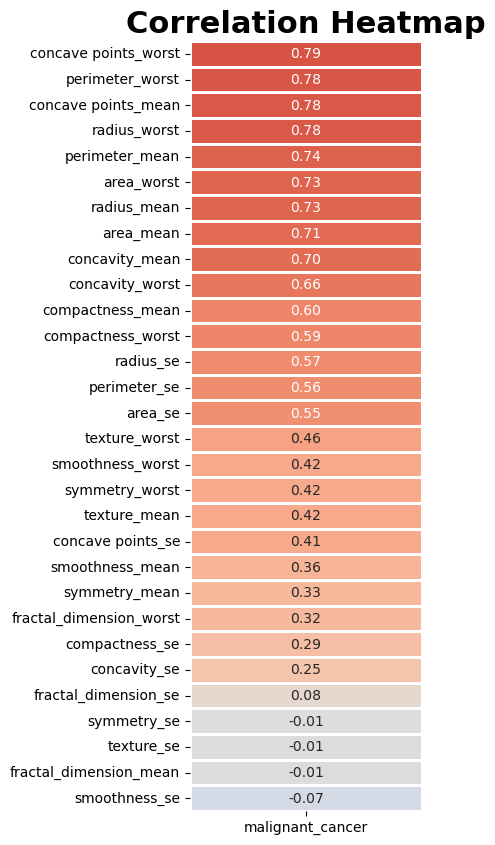

In [26]:
fig, ax = plt.subplots(figsize=(3, 10))
cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(data = data_cancer, annot=True, fmt=".2f", cmap=cmap, linewidths= 1, vmin=-1, vmax=1, cbar= False)
plt.title("Correlation Heatmap", fontsize=22, fontweight= "bold")
plt.show()

###### Creating a CountPlot to visualize the count of different categories in the 'diagnosis' column of your DataFrame (df)

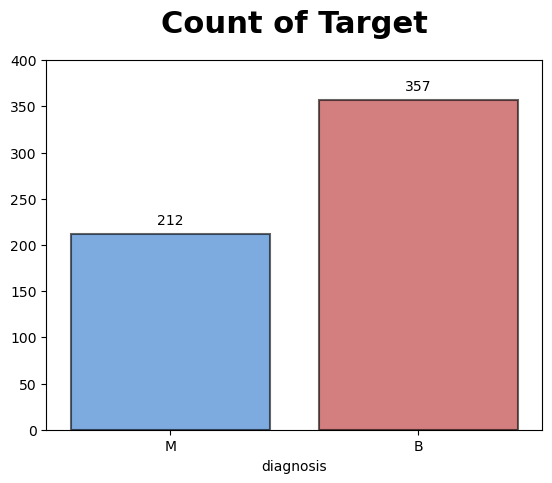

In [28]:
plot= sns.countplot(data= df, x= "diagnosis", palette=['#0b6fe7',"#cf1112"], alpha= 0.6, edgecolor="0", linewidth=1.5)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2,bar.get_height()),
                 ha='center', va='center',
                 size=10, xytext=(0, 10),
                 textcoords='offset points')
plt.ylim(0, 400)
plt.title("Count of Target", fontsize=22, fontweight= "bold", pad= 20)
plt.ylabel("")

plt.show()

## 3. Splitting Data

In [30]:
df = df.rename({'diagnosis':'malignant_cancer'},axis='columns')
X = df.drop(['id','malignant_cancer'],axis=1)
y = df['malignant_cancer']
# Converting Categorical data into Numeric data
y = y.apply(mapping)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4421)

## 4. Standardization

##### Standardize the data values into a standard format using StandardScaler

In [37]:
scaler = StandardScaler()

scaler.fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

## 5. Modeling
The model that will be used is:  
    1. K-Nearest Neighbors (KNN)  
    2. Random Forest Classifier  
    3. Linear Regression  
    4. Decision Tree Classifier  
    5. Logistic Regression  

### 1. K Nearest Neigbors

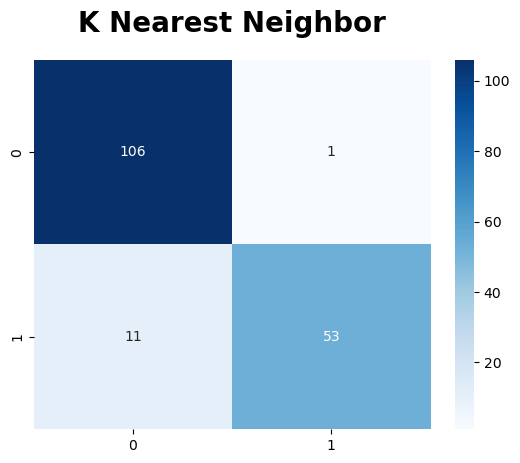

,Model,Accuracy,Precision,Recall,F1 Score
0,K Nearest Neighbors,0.929825,0.981481,0.828125,0.898305


In [104]:
# Defining Model
value = 100
neigh_model= KNeighborsClassifier(n_neighbors=value)

# Fitting Model
neigh_model.fit(X_train_scaled, y_train)

# Predicting Model
y_pred= neigh_model.predict(X_test_scaled)

# Putting Results in a Dataframe
results_df = pd.DataFrame(
    data=[["K Nearest Neighbors", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Creating Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp_neigh = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
disp_neigh = disp_neigh.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("K Nearest Neighbor", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df

### 2. Random Forest

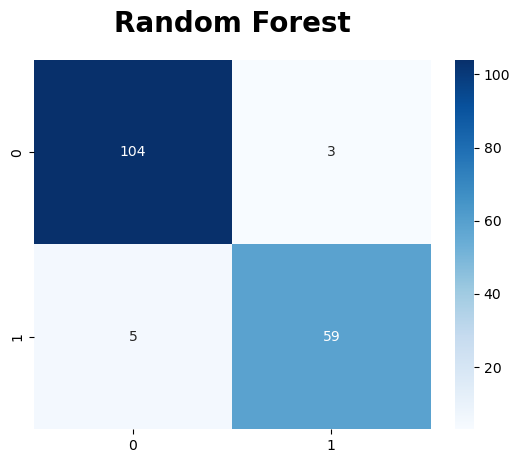

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.953216,0.951613,0.921875,0.936508


In [105]:
# Defining Model
estm = 100
rand_model= RandomForestClassifier(n_estimators=estm, random_state=42)

# Fitting Model
rand_model.fit(X_train_scaled, y_train)

# Predicting Model
y_pred= rand_model.predict(X_test_scaled)

# Putting Results in a Dataframe
results_df_2 = pd.DataFrame(
    data=[["Random Forest", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = results_df._append(results_df_2, ignore_index=True)

# Creating Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp_rand = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
disp_rand = disp_rand.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Random Forest", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df_2

### 3. Linear Regression

               Model  Mean Squared Error  R-squared  Accuracy  Precision  \
0  Linear Regression            0.064393    0.72504       NaN        NaN   
1      Decision Tree                 NaN        NaN  0.929825   0.933333   

   Recall  F1 Score  
0     NaN       NaN  
1   0.875  0.903226  


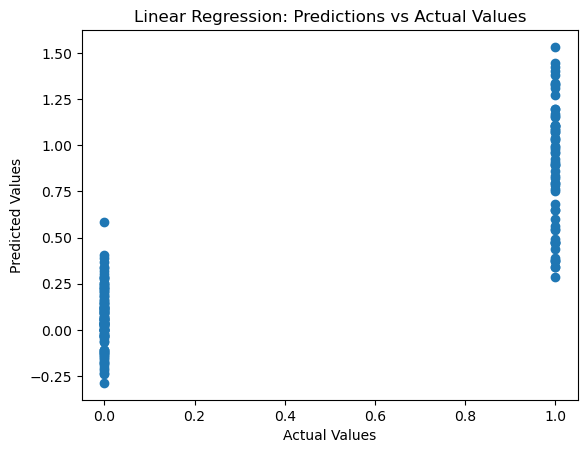

In [75]:
# Defining Model
lin_model = LinearRegression()

# Fitting Model
lin_model.fit(X_train_scaled, y_train)

# Predicting Model
y_pred = lin_model.predict(X_test_scaled)

# Calculating Regression Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Putting Results in a Dataframe
results_df = pd.DataFrame(
    data=[["Linear Regression", mse, r2]],
    columns=['Model', 'Mean Squared Error', 'R-squared']
)

results_df = results_df._append(results_df_2, ignore_index=True)

# Displaying Regression Metrics
print(results_df)

# Plotting Predictions vs Actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Predictions vs Actual Values")
plt.show()

### 4. Decision Tree

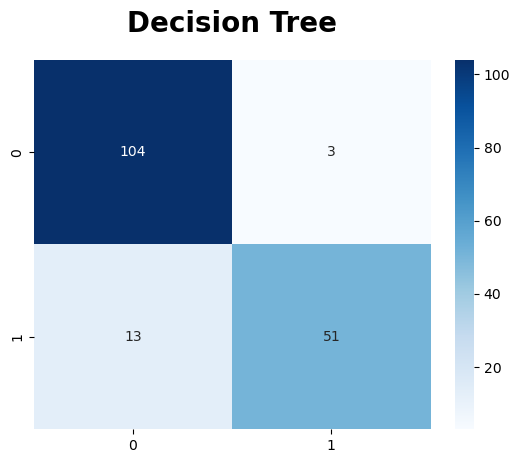

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.906433,0.944444,0.796875,0.864407


In [106]:
dt_model= DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
y_pred= dt_model.predict(X_test_scaled)
results_df_3 = pd.DataFrame(
    data=[["Decision Tree", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = results_df._append(results_df_3, ignore_index=True)

cm = confusion_matrix(y_test, y_pred)
disp_dt = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
disp= disp_dt.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Decision Tree", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df_3

### 5. Logistic Regression

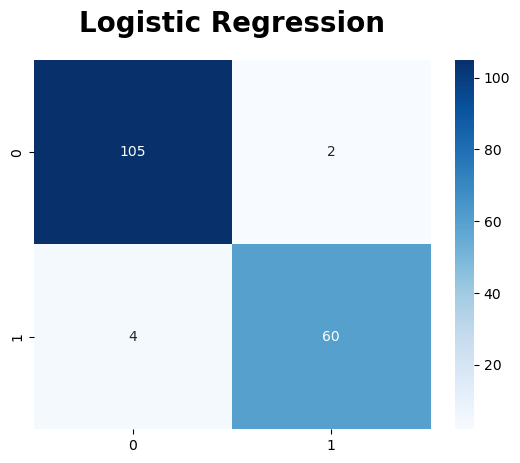

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.964912,0.967742,0.9375,0.952381


In [107]:
# Defining Model
log_model= LogisticRegression()

# Fitting Model
log_model.fit(X_train_scaled, y_train)

# Predicting Model
y_pred= log_model.predict(X_test_scaled)

# Putting Results in a Dataframe
results_df_4 = pd.DataFrame(
    data=[["Logistic Regression", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = results_df._append(results_df_4, ignore_index=True)

# Creating Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp_log = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Logistic Regression", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df_4

## 6. Model Comparison

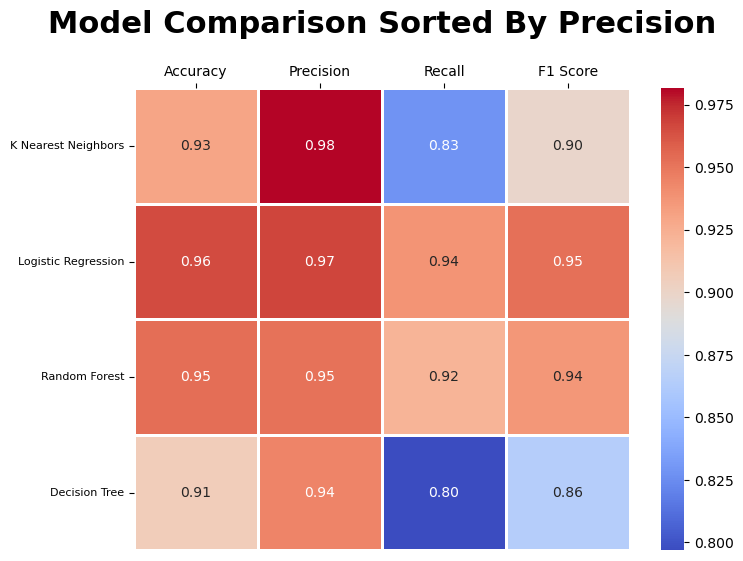

In [108]:
plt.figure(figsize= (8, 6))
data= results_df.set_index("Model").sort_values("Precision", ascending= False)

ax= sns.heatmap(data, annot=True, fmt=".2f", cmap=cmap, linewidths= 1)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 8)
ax.xaxis.tick_top()
plt.title("Model Comparison Sorted By Precision", fontsize= 22, fontweight= "bold", pad= 40)
plt.ylabel("")
# plt.savefig("comparison_2.png", dpi= 300, bbox_inches='tight', transparet= False, facecolor= "white")

plt.show()